In [1]:
import csv#没有数据预处理的，五类别的
 
#read file, for example
file_path = 'C:/Users/chenxihui/Desktop/code/project/2010.csv'
file = open(file_path)
data = []
for i in file.readlines():
    data.append(i)
file.close()

In [2]:
new_data = []
for row in data:
    tmp = row.strip('\n')  #去掉每行最后的回车符
    tmp = tmp.split(',')   #根据','来分割字符串，使之成为含有一个个数据的列表
    new_data.append(tmp)   #new_data的每一行数据就是一个列表

In [3]:
select_data = []
pv_size=[]
length=len(new_data)
for i in range(length):
    if(new_data[i][0]=='2' or new_data[i][0]=='13' or new_data[i][0]=='14' or new_data[i][0]=='20' or new_data[i][0]=='33' or new_data[i][0]=='35' or new_data[i][0]=='38' or new_data[i][0]=='39' or new_data[i][0]=='56' or new_data[i][0]=='69' or new_data[i][0]=='73' or new_data[i][0]=='74' or new_data[i][0]=='75' or new_data[i][0]=='82' or new_data[i][0]=='87' or new_data[i][0]=='88' or new_data[i][0]=='101' or new_data[i][0]=='104' or new_data[i][0]=='106' or new_data[i][0]=='109' or new_data[i][0]=='110' or new_data[i][0]=='119' or new_data[i][0]=='124' or new_data[i][0]=='130' or new_data[i][0]=='137' or new_data[i][0]=='141' or new_data[i][0]=='144' or new_data[i][0]=='152' or new_data[i][0]=='153' or new_data[i][0]=='157' or new_data[i][0]=='161' or new_data[i][0]=='169' or new_data[i][0]=='176' or new_data[i][0]=='184' or new_data[i][0]=='188' or new_data[i][0]=='189' or new_data[i][0]=='193' or new_data[i][0]=='201' or new_data[i][0]=='202' or new_data[i][0]=='204' or new_data[i][0]=='206' or new_data[i][0]=='207' or new_data[i][0]=='210' or new_data[i][0]=='211' or new_data[i][0]=='212' or new_data[i][0]=='214' or new_data[i][0]=='218' or new_data[i][0]=='244' or new_data[i][0]=='246' or new_data[i][0]=='253' or new_data[i][0]=='256' or new_data[i][0]=='273' or new_data[i][0]=='276' or new_data[i][0]=='297'):
        select_data.append(new_data[i][1:])#[5:]
        pv_size.append(new_data[i][1:4])

In [25]:
pv_size[0]

['1.62', '2259', 'GC']

In [4]:
GC=[]
CL=[]
GG=[]
Length_select_data = len(pv_size)
for i in range(Length_select_data):
    if(pv_size[i][2]=='GC'):
        GC.append(pv_size[i][0])
    elif(pv_size[i][2]=='CL'):
        CL.append(pv_size[i][0])
    else:
        GG.append(pv_size[i][0])

In [8]:
import numpy as np
pv=[]
for i in range(len(GC)):
    if((i+1)%365==0):
        pv.append(GC[i])
pv2=np.array(pv,float)

In [9]:
pv2#做个表格出来

array([1.62, 2.22, 1.48, 1.57, 2.1 , 2.1 , 1.05, 1.05, 2.1 , 2.04, 2.  ,
       4.04, 8.  , 3.78, 2.  , 1.8 , 2.04, 1.48, 1.5 , 6.2 , 2.8 , 2.1 ,
       1.2 , 1.5 , 1.9 , 3.  , 1.5 , 4.2 , 2.1 , 9.99, 3.2 , 2.04, 1.75,
       1.05, 1.48, 2.04, 4.  , 1.75, 1.05, 1.58, 1.9 , 2.7 , 1.94, 1.5 ,
       2.1 , 1.53, 1.53, 2.  , 1.53, 2.8 , 4.55, 3.6 , 2.  , 1.5 ])

In [14]:
import numpy as np
pv=np.array(pv_size)
numdict={}
for key in pv:
	numdict[key]=numdict.get(key,0)+1
for key,value in numdict.items():
	if numdict[key] >= 2:
		print(key)

1.62
2.22
1.48
1.57
2.1
1.05
2.04
2
4.04
8
3.78
1.8
1.5
6.2
2.8
1.2
1.9
3
4.2
9.99
3.2
1.75
4
1.58
2.7
1.94
1.53
4.55
3.6


In [5]:
GC=[]
CL=[]
GG=[]
Length_select_data = len(select_data)
for i in range(Length_select_data):
    if(select_data[i][0]=='GC'):
        GC.append(select_data[i][2:])
    elif(select_data[i][0]=='CL'):
        CL.append(select_data[i][2:])
    else:
        GG.append(select_data[i][2:])

In [27]:
import numpy as np

GC_temp=np.array(GC)
GC_array=[]
GC_array = GC_temp.astype(np.float)#春季有90天，夏季有91天，秋有92天，冬有92天

CL_temp=np.array(CL)
CL_array=[]
CL_array = CL_temp.astype(np.float)

GG_temp=np.array(GG)
GG_array=[]
GG_array = GG_temp.astype(np.float)
GG_array[1]

1.62

In [7]:
from collections import defaultdict
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt


def point_avg(points):
    """
    Accepts a list of points, each with the same number of dimensions.
    NB. points can have more dimensions than 2
    
    Returns a new point which is the center of all the points.
    """
    dimensions = len(points[0])

    new_center = []

    for dimension in range(dimensions):
        dim_sum = 0  # dimension sum
        for p in points:
            dim_sum += p[dimension]

        # average of each dimension
        new_center.append(dim_sum / float(len(points)))

    return new_center


def update_centers(data_set, assignments):
    """
    Accepts a dataset and a list of assignments; the indexes 
    of both lists correspond to each other.
    Compute the center for each of the assigned groups.
    Return `k` centers where `k` is the number of unique assignments.
    """
    new_means = defaultdict(list)
    centers = []
    for assignment, point in zip(assignments, data_set):
        new_means[assignment].append(point)
        
    for points in new_means.values():
        centers.append(point_avg(points))

    return centers


def assign_points(data_points, centers):
    """
    Given a data set and a list of points betweeen other points,
    assign each point to an index that corresponds to the index
    of the center point on it's proximity to that point. 
    Return a an array of indexes of centers that correspond to
    an index in the data set; that is, if there are N points
    in `data_set` the list we return will have N elements. Also
    If there are Y points in `centers` there will be Y unique
    possible values within the returned list.
    """
    assignments = []
    final_distance=[]
    for point in data_points:
        shortest = (1000)  # positive infinity
        shortest_index = 0
        for i in range(len(centers)):
            val = distance(point, centers[i])
            if(val < shortest):
                shortest = val
                shortest_index = i
        final_distance.append(shortest)
        assignments.append(shortest_index)
    return assignments,final_distance


def distance(a, b):
    """
    """
    dimensions = len(a)
    
    _sum = 0
    for dimension in range(dimensions):
        difference_sq = (a[dimension] - b[dimension]) ** 2
        _sum += difference_sq
    return sqrt(_sum)


def generate_k(data_set, k):
    """
    Given `data_set`, which is an array of arrays,
    find the minimum and maximum for each coordinate, a range.
    Generate `k` random points between the ranges.
    Return an array of the random points within the ranges.
    """
    centers = []
    dimensions = len(data_set[0])
    min_max = defaultdict(int)

    for point in data_set:
        for i in range(dimensions):
            val = point[i]
            min_key = 'min_%d' % i
            max_key = 'max_%d' % i
            if min_key not in min_max or val < min_max[min_key]:
                min_max[min_key] = val
            if max_key not in min_max or val > min_max[max_key]:
                min_max[max_key] = val

    for _k in range(k):
        rand_point = []
        for i in range(dimensions):
            min_val = min_max['min_%d' % i]
            max_val = min_max['max_%d' % i]
            
            rand_point.append(uniform(min_val, max_val))

        centers.append(rand_point)

    return centers


def k_means(dataset, k):
    k_points = generate_k(dataset, k)
    assignments, distances = assign_points(dataset, k_points)
    old_assignments = None
    centers_history = []
    Distance = []
    while assignments != old_assignments:
        new_centers = update_centers(dataset, assignments)
        centers_history.append(new_centers)
        old_assignments = assignments
        assignments,distances = assign_points(dataset, new_centers)#centers_history[-1]
    return zip(assignments, dataset),centers_history,zip(assignments,distances)

In [8]:
out,final_center,distances = k_means(GC_array, 5)
list = []   # so, we need to show it in list
list_distance = []
for i in out:
    list.append(i)
for i in distances:
    list_distance.append(i)
print(list_distance[0])

(0, 3.027580855247497)


In [9]:
dist1=[]
dist2=[]
dist3=[]
dist4=[]
dist5=[]
length_list_distance=len(list_distance)
for i in range(length_list_distance):
    if(list_distance[i][0]==0):
        dist1.append(list_distance[i][1])
    elif(list_distance[i][0]==1):
        dist2.append(list_distance[i][1])
    elif(list_distance[i][0]==2):
        dist3.append(list_distance[i][1])
    elif(list_distance[i][0]==3):
        dist4.append(list_distance[i][1])
    elif(list_distance[i][0]==4):
        dist5.append(list_distance[i][1])
print(dist1[0])

3.027580855247497


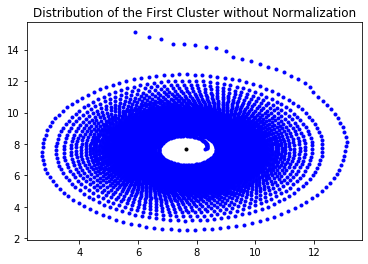

In [10]:
import numpy as np
dist1.sort()
max_dist1=dist1[-1]
len_dist1=len(dist1)
for i in range(len_dist1):
    theta=(i+1)*360/(len_dist1+1)
    x=max_dist1+dist1[i]*np.cos(theta)
    y=max_dist1+dist1[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist1, max_dist1, c='k', marker='.')
plt.title('Distribution of the First Cluster without Normalization')
plt.show()

In [27]:
distance(final_center[-1][0],final_center[-1][1])

2.640033129905363

In [37]:
distance(final_center[-1][0],final_center[-1][2])

2.6930353700298912

In [38]:
distance(final_center[-1][0],final_center[-1][3])

1.6834171773881281

In [39]:
distance(final_center[-1][0],final_center[-1][4])

6.948754731345555

In [22]:
a=[1,2]
l=len(a)
for i in range(l):
    print(i)

0
1


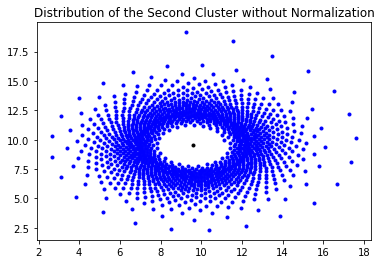

In [11]:
import numpy as np
dist2.sort()
max_dist2=dist2[-1]
len_dist2=len(dist2)
for i in range(len_dist2):
    theta=(i+1)*360/(len_dist2+1)
    x=max_dist2+dist2[i]*np.cos(theta)
    y=max_dist2+dist2[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist2, max_dist2, c='k', marker='.')
plt.title('Distribution of the Second Cluster without Normalization')
plt.show()

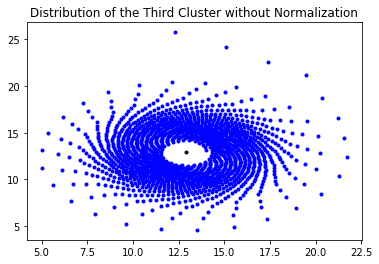

In [12]:
dist3.sort()
max_dist3=dist3[-1]
len_dist3=len(dist3)
for i in range(len_dist3):
    theta=(i+1)*360/(len_dist3+1)
    x=max_dist3+dist3[i]*np.cos(theta)
    y=max_dist3+dist3[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist3, max_dist3, c='k', marker='.')
plt.title('Distribution of the Third Cluster without Normalization')
plt.show()

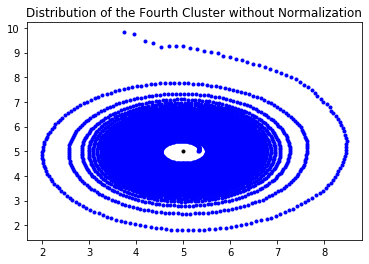

In [13]:
dist4.sort()
max_dist4=dist4[-1]
len_dist4=len(dist4)
for i in range(len_dist4):
    theta=(i+1)*360/(len_dist4+1)
    x=max_dist4+dist4[i]*np.cos(theta)
    y=max_dist4+dist4[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist4, max_dist4, c='k', marker='.')
plt.title('Distribution of the Fourth Cluster without Normalization')
plt.show()

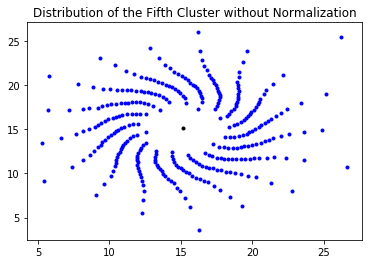

In [14]:
dist5.sort()
max_dist5=dist5[-1]
len_dist5=len(dist5)
for i in range(len_dist5):
    theta=(i+1)*360/(len_dist5+1)
    x=max_dist5+dist5[i]*np.cos(theta)
    y=max_dist5+dist5[i]*np.sin(theta)
    plt.plot(x,y,c='b',marker='.')
plt.plot(max_dist5, max_dist5, c='k', marker='.')
plt.title('Distribution of the Fifth Cluster without Normalization')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

seed = 9# 设置随机数
clf = KMeans(n_clusters=5, random_state=seed)# 构造k-means聚类器
clf.fit(GC_array)# 拟合模型
#print(clf.cluster_centers_) # 以数组形式查看KMeans聚类后的质心点，即聚类中心。

#图形化展示
label_pred = clf.labels_ #获取聚类标签
centroids = clf.cluster_centers_ #获取聚类中心
inertia = clf.inertia_ # 获取聚类准则的总和
mark = ['or', 'ob', 'og', 'ok', 'oy']
# 这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
color = 0
j = 0 
for i in label_pred:
    plt.plot([GC_array[j:j+1,0]], [GC_array[j:j+1,1]],
     mark[i], markersize = 5)
    j +=1
plt.show()

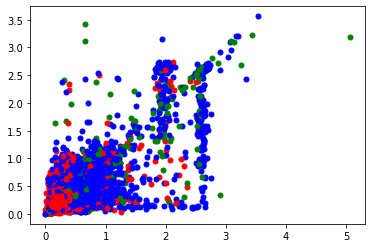

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

seed = 9# 设置随机数
clf = KMeans(n_clusters=3, random_state=seed)# 构造k-means聚类器
clf.fit(GC_array)# 拟合模型
#print(clf.cluster_centers_) # 以数组形式查看KMeans聚类后的质心点，即聚类中心。

#图形化展示
label_pred = clf.labels_ #获取聚类标签
centroids = clf.cluster_centers_ #获取聚类中心
inertia = clf.inertia_ # 获取聚类准则的总和
mark = ['or', 'ob', 'og', 'ok', 'oy']
# 这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
color = 0
j = 0 
for i in label_pred:
    plt.plot([GC_array[j:j+1,0]], [GC_array[j:j+1,1]],
     mark[i], markersize = 5)
    j +=1
plt.show()

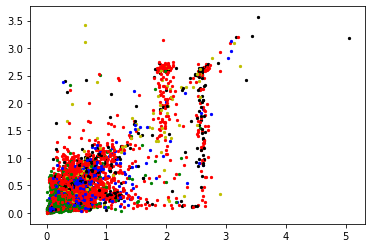

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

seed = 9# 设置随机数
clf = KMeans(n_clusters=5, random_state=seed)# 构造k-means聚类器
clf.fit(GC_array)# 拟合模型
#print(clf.cluster_centers_) # 以数组形式查看KMeans聚类后的质心点，即聚类中心。

mark = ['r', 'b', 'g', 'k', 'y']
# 这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
for id,label in enumerate(clf.labels_):
    plt.scatter([GC_array[id][0]], [GC_array[id][1]],
     color=mark[label], marker='o',s=5)
plt.show()

In [18]:
clf.labels_

array([0, 1, 3, ..., 2, 0, 2])

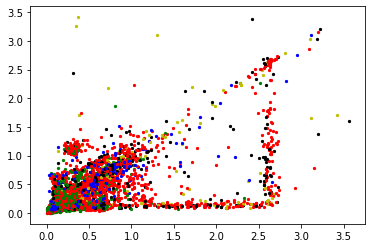

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

seed = 9# 设置随机数
clf = KMeans(n_clusters=5, random_state=seed)# 构造k-means聚类器
clf.fit(GC_array)# 拟合模型
#print(clf.cluster_centers_) # 以数组形式查看KMeans聚类后的质心点，即聚类中心。

mark = ['r', 'b', 'g', 'k', 'y']
# 这里'or'代表中的'o'代表画圈，'r'代表颜色为红色，后面的依次类推
for id,label in enumerate(clf.labels_):
    plt.scatter([GC_array[id][1]], [GC_array[id][2]],
     color=mark[label], marker='o',s=5)
plt.show()